# IRIS Dataset

# Read and Load dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris = pd.read_csv("C:\\Users\\user\\Downloads\\Iris.csv")



In [2]:
print(iris.shape)


(150, 6)


In [3]:
print(iris.columns)


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [4]:
iris["Species"].value_counts()


Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

# Scatter plots

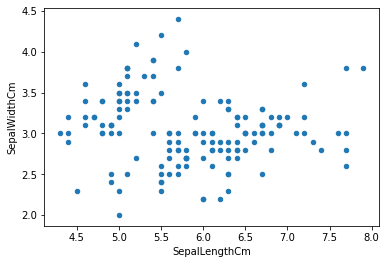

In [5]:
iris.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm');
plt.show()


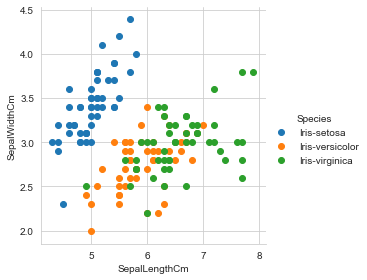

In [6]:
sns.set_style('whitegrid');
sns.FacetGrid(iris, hue="Species", height=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();

# Pair-plot, Dist-plot

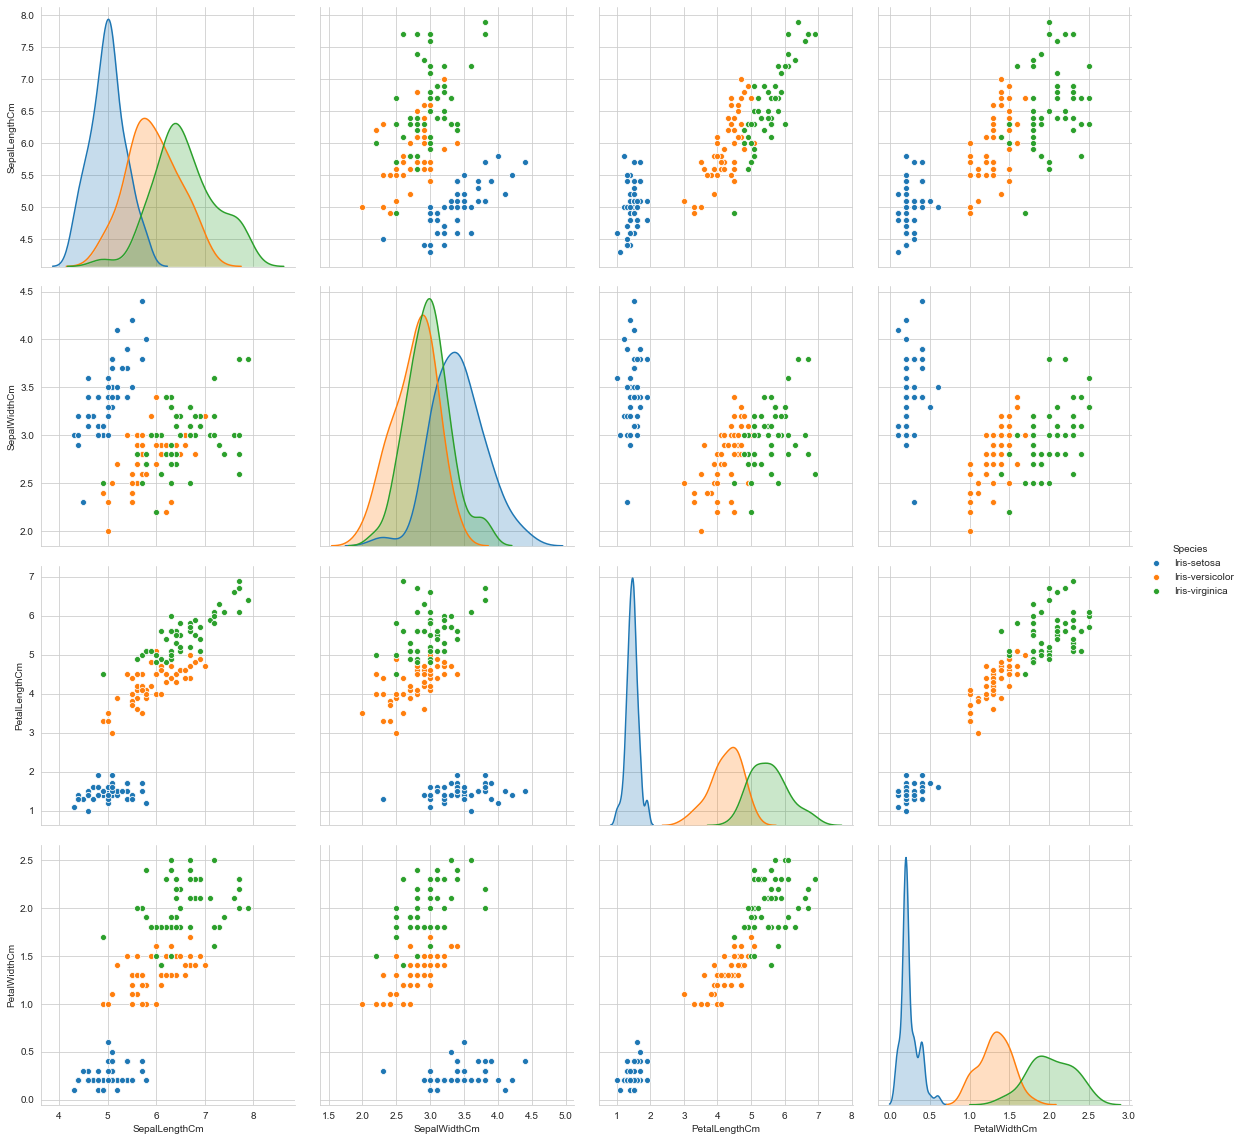

In [7]:
iris = iris.drop(columns="Id")
plt.close();
sns.set_style('whitegrid');
sns.pairplot(iris, hue="Species", height=4);
plt.show();

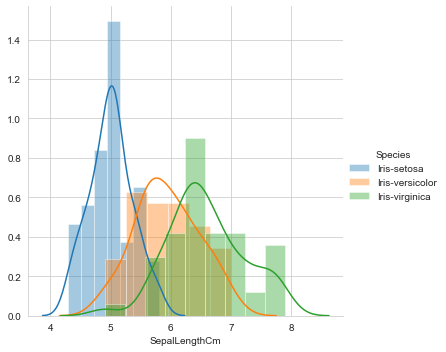

In [8]:
sns.FacetGrid(iris, hue="Species", height=5) \
   .map(sns.distplot, "SepalLengthCm") \
   .add_legend();
plt.show();


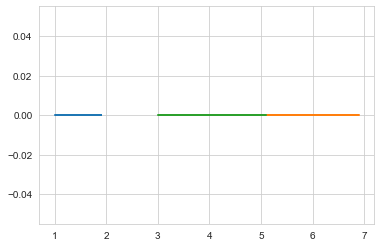

In [9]:
import numpy as np
iris_set = iris.loc[iris["Species"] == "Iris-setosa"];
iris_virg = iris.loc[iris["Species"] == "Iris-virginica"];
iris_vers = iris.loc[iris["Species"] == "Iris-versicolor"];
#print(Iris_sertosa["petal_length"])
plt.plot(iris_set["PetalLengthCm"], np.zeros_like(iris_set['PetalLengthCm']));
plt.plot(iris_virg["PetalLengthCm"], np.zeros_like(iris_virg['PetalLengthCm']));
plt.plot(iris_vers["PetalLengthCm"], np.zeros_like(iris_vers['PetalLengthCm']));



# Pdf , Cdf

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


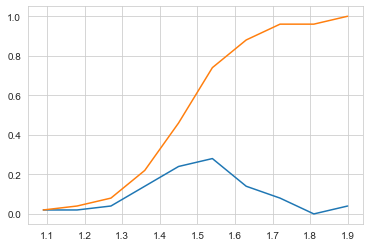

In [10]:
#build pdf and then cdf
counts, bin_edges = np.histogram(iris_set['PetalLengthCm'],bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute cdf
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show();

# Mean, Variance, Std-deviations

In [11]:
#mean, Variance, std-deviations
print("Means:")
print(np.mean(iris_set["PetalLengthCm"]))
#mean with an outlier.
print(np.mean(np.append(iris_set["PetalLengthCm"], 50)));
print(np.mean(iris_virg["PetalLengthCm"]))
print(np.mean(iris_vers["PetalLengthCm"]))

print("\nStd-dev:");
print(np.std(iris_set["PetalLengthCm"]))
print(np.std(iris_virg["PetalLengthCm"]))
print(np.std(iris_vers["PetalLengthCm"]))




Means:
1.464
2.4156862745098038
5.552
4.26

Std-dev:
0.17176728442867115
0.5463478745268441
0.4651881339845204


# Median, Quantiles, Percentiles

In [12]:
#median
print("\n Medians:")
print(np.median(iris_set["PetalLengthCm"]))
#mean with an outlier.
print(np.median(np.append(iris_set["PetalLengthCm"], 50)));
print(np.median(iris_virg["PetalLengthCm"]))
print(np.median(iris_vers["PetalLengthCm"]))

#quantiles
print("\nQuantiles:");
print(np.percentile(iris_set["PetalLengthCm"], np.arange(0, 100, 25)))
print(np.percentile(iris_virg["PetalLengthCm"], np.arange(0, 100, 25)))
print(np.percentile(iris_vers["PetalLengthCm"], np.arange(0, 100, 25)))
#percentiles
print("\n90's Percentiles:");
print(np.percentile(iris_set["PetalLengthCm"], 90))
print(np.percentile(iris_virg["PetalLengthCm"], 90))
print(np.percentile(iris_vers["PetalLengthCm"], 90))



 Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90's Percentiles:
1.7
6.3100000000000005
4.8


In [13]:
from statsmodels import robust
print("\nMedian Absolute Deviation")
print(robust.mad(iris_set["PetalLengthCm"]))
print(robust.mad(iris_virg["PetalLengthCm"]))
print(robust.mad(iris_vers["PetalLengthCm"]))


Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


# Box plot , Violin plot

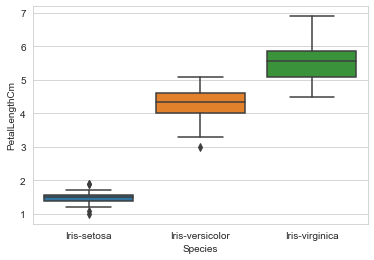

In [14]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
plt.show()

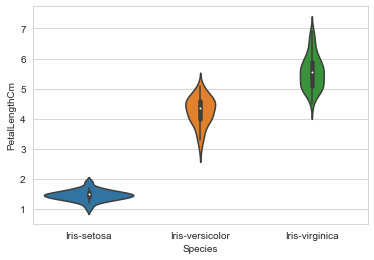

In [15]:
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, height=8)
plt.show()

# Jointplot

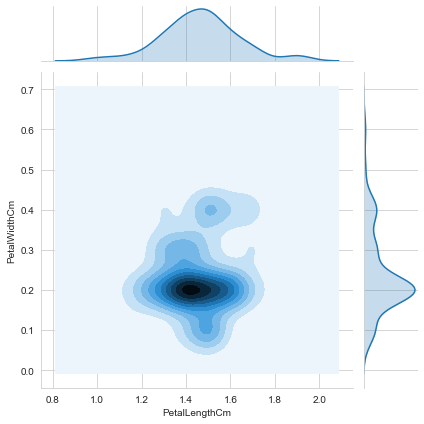

In [16]:
sns.jointplot(x="PetalLengthCm", y="PetalWidthCm", data=iris_set, kind="kde")
plt.show()